### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**




 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.
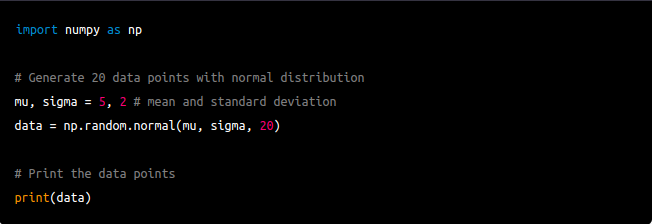
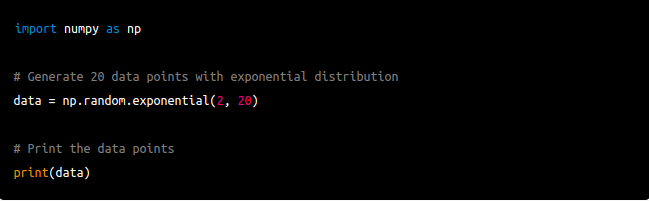



2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf

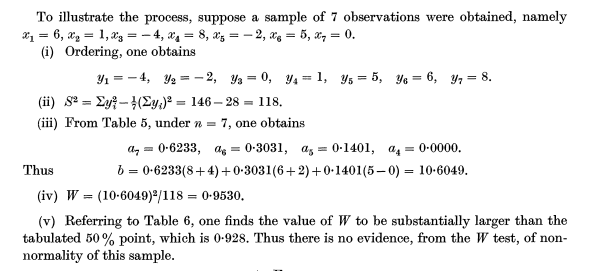

Таблиці 5 та 6 знаходяться в додатках до практикуму.


3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 4. Назва стовпчиків - Variable,	Statistics,	W-value	Distribution.
Шаблон таблиці:

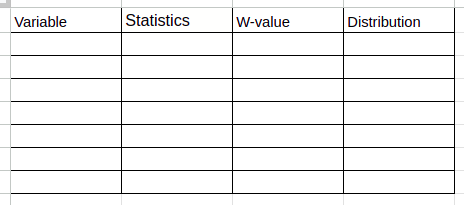

4. Занести в стовпчик Variable назви змінних.

5. Занести в стовпчик W-value, Distribution результати роботи критерію Шапіро-Уілка. Додати до таблиці значення розрахунку критерію, та користуючись таблицями. 

6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

8. Для кожної змінної створити графік розподілення, який візуально зобразить розподіл даних.


In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict

In [183]:
class Count:
    '''При створенні екземпляру класа, передайте масив назв ваших масивів, далі словник з двома ключами `params` та `arrs`, 
    де по порядку відповідно будуть розташовані параметри та масиви розподілів.'''
    def __init__(self, var_names: List[str], _params: Dict[str, List[List[float]]]):
        self.b_list = pd.read_excel('5 - Coeficients for the W test for normality.xlsx')
        self.w = pd.read_excel('table_6.xlsx')
        self.var_names: List[str] = var_names
        self.params: Dict = _params
        
    def shapiro_wilk(self, arr: List[float]) -> float:
        arr = np.sort(arr)
        s_2 = sum(x*x for x in arr) - (sum(arr)**2)/len(arr)
        b_col = list(self.b_list[len(arr)].dropna())
        s = 0
        for i, j in zip(range(len(arr)-1, len(arr)-1-len(b_col), -1), range(len(b_col))):
            s+=(arr[i]-arr[len(arr)-i-1]) * b_col[j]
        W_shapir = s**2/s_2
        return W_shapir
    
    def create_df(self):
        
        data = {'Variable':self.var_names,
               'Statistics':[],
               'W-value':list(map(self.shapiro_wilk, self.params['arrs'])),
               'Distribution': []}

        data['Distribution'] = ['Normal' if data['W-value'][i] > 
                                float(w.loc[w['n'] == len(self.params['arrs'][i])]['0-5'])
                                else 'Non normal' for i in range(len(self.var_names))]
        
        data['Statistics'] = [f"{self.params['params'][i][0]}[{self.params['params'][i][1]}]"
                             if data['Distribution'][i] == 'Normal' else
                             f"{round(np.quantile(self.params['arrs'][i], 0.5), 3)}[{round(np.quantile(self.params['arrs'][i], 0.25), 3)},{round(np.quantile(self.params['arrs'][i], 0.75),3)}]"
                             for i in range(len(self.var_names))]
        
        df = pd.DataFrame(data)
        return df
    
    def plot_distributions(self):
        for title, graph in zip(self.var_names, self.params['arrs']):
            sns.distplot(graph, hist=False, color = 'black')
            plt.title(f'Distribution of {title}')
            plt.show()
        

In [184]:
norm_params1: List[float] = [7.0, 3.0]
norm_data1: List[float] = np.random.normal(norm_params1[0], norm_params1[1], 20)
exp_params1: List[float] = [2.0]
exp_data1: List[float] = np.random.exponential(exp_params1[0], 20)
log_params1: List[float] = [5.0, 1.0]
log_data1: List[float] = np.random.lognormal(log_params1[0], log_params1[1], 20)

params: Dict[str, List[float]] = {'params': [norm_params1, exp_params1, log_params1],
                                 'arrs': [norm_data1.tolist(), exp_data1.tolist(), log_data1.tolist()]}

In [185]:
a = Count(['norm_data1', 'exp_data1', 'log_data1'], params)

In [186]:
a.create_df()

,Variable,Statistics,W-value,Distribution
0,norm_data1,7.0[3.0],0.950827,Normal
1,exp_data1,"1.727[0.488,2.675]",0.763969,Non normal
2,log_data1,"151.849[71.756,360.231]",0.690696,Non normal


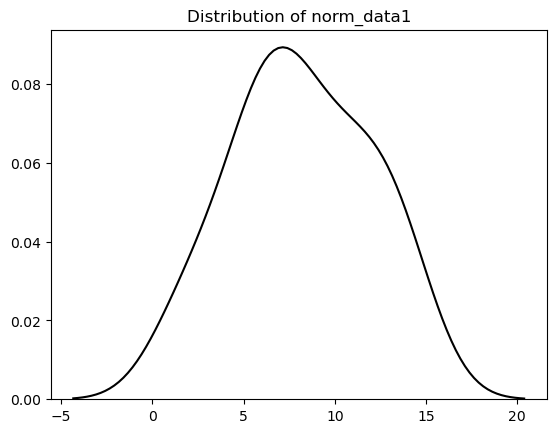

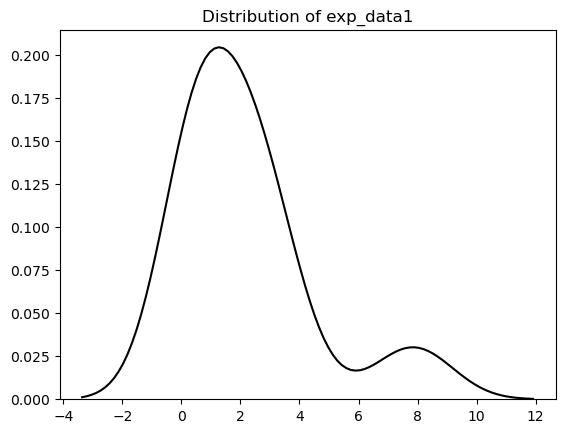

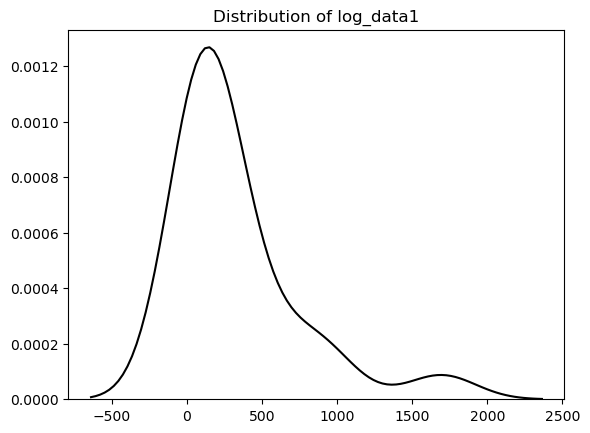

In [187]:
a.plot_distributions()